# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal?

Text(0.5, 1.0, 'Human Body Temperature')

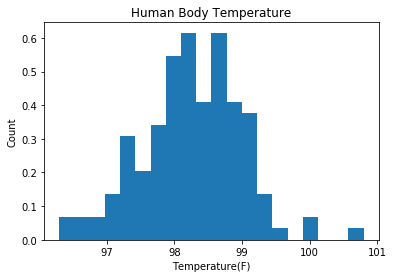

In [40]:
plt.hist(df['temperature'],bins = 20,density = 'True')
plt.xlabel('Temperature(F)')
plt.ylabel('Count')
plt.title('Human Body Temperature')

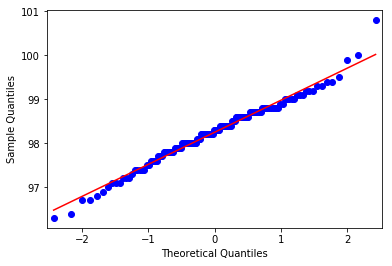

In [3]:
import statsmodels.api as sm
import pylab
sm.qqplot(df['temperature'], line='s')
pylab.show()

As we can see from the both the histogram and qqplot, the oberservations are normally distributed.

## 2. Is the sample size large? Are the observations independent?

In [5]:
gender_count  = df.groupby('gender').count()
print('total_observation: '+ str(len(df)))
print(gender_count)
# The total obervation is 130, which is larger than 30.

total_observation: 130
        temperature  heart_rate
gender                         
F                65          65
M                65          65


The total obervation is 130 and is evenly break down by gender, which meet the Central Limit Theorem(sample size >30).  So the sample size is large enough and the observation is independent.



## 3. Is the true population mean really 98.6 degrees F?

First, let's run the bootstrap hypothesis test:</p>
H0: The true population mean is 98.6°F.</p>  
Ha: The true population mean is NOT 98.6°F.

In [6]:
temperature = df['temperature']
bootstrap_replicates = np.empty(10000)
for i in range(10000):
    bootstrap_sample = np.random.choice(temperature, size = len(df))
    bootstrap_replicates[i] = np.mean(bootstrap_sample)
p = np.sum(bootstrap_replicates >= 98.6) / 10000
print("p: " + str(p))


p: 0.0


The p-value is 0.0, which is smaller than 0.05. Statistically, we have to reject H0. So, the true population mean is not 98.6°F.

Then is the Z test:

In [7]:
mean = np.mean(temperature)
std = np.std(temperature)
#z score is 1.96 under 95% confidence interval
confidence_interval = std*1.96/(len(temperature) ** 0.5)
#print(confidence_interval, mean)
print(mean - confidence_interval, mean + confidence_interval)

98.12367980442819 98.37478173403336


The Z test shows that under 95% confidence interval, the true mean lies between 98.124 and 98.375, which 98.6 is an outlier. So 98.6 is not the true mean.

Finally, let's run the T test:</p>
H0: The true population mean is 98.6°F.</p>  
Ha: The true population mean is NOT 98.6°F.

In [8]:
from scipy.stats import ttest_1samp
t,p = ttest_1samp(temperature,98.6)
print('t: ' + str(t), 'P-value: ' + str(p))

t: -5.4548232923645195 P-value: 2.4106320415561276e-07


The p value is smaller than 0.05, so we have to reject H0. The true mean is not 98.6.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [44]:
temperature_10 = np.random.choice(temperature, size = 10)
print(temperature_10)

[97.6 98.7 97.6 98.7 99.  98.4 98.  98.4 98.2 97.2]


In [45]:
mean_10 = np.mean(temperature_10)
std_10 = np.std(temperature_10)
confidence_itv = std_10*1.96/(len(temperature_10) ** 0.5)
print(mean_10 - confidence_itv, mean_10 + confidence_itv)

97.84187869632336 98.51812130367668


In [10]:
#z score is 1.96 under 95% confidence interval
confidence_itv = std_10*1.96/(len(temperature_10) ** 0.5)
#print(confidence_interval, mean)
print(mean_10 - confidence_itv, mean_10 + confidence_itv)

98.22186540339075 99.31813459660927


In [49]:
t,t_p = ttest_1samp(temperature_10,98.6)
print('t: ' + str(t), 'P-value: ' + str(t_p))

t: -2.3096920615861607 P-value: 0.04625981064987782


In [48]:
z = (mean_10 - 98.6)/(std_10/np.sqrt(len(temperature_10)))
z_p= stats.norm.sf(abs(z))*2 
print('z: ' + str(t), 'P-value: ' + str(z_p))

z: 0.5766855018198974 P-value: 0.014907056844849186


P values for both tests are smaller than 0.05, meaning that 98.6 is not the true mean temperature. 
However, the p values from z test and t test varied from each other and also changed each time as the random selected 10 numbers changed. Generally, for a dataset with sample smaller than 30, it is more wise to run t-test.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [33]:
confidence_interval = std*1.96/1

normal_temp = [mean - confidence_interval, mean + confidence_interval]

print(normal_temp)


[96.8177295225769, 99.68073201588466]


 Any temperature outside the range 96.82F ~ 99.68F should be considered abnormal.

## 6. Is there a significant difference between males and females in normal temperature?


In [35]:
male = df[df['gender'] == 'M']['temperature']
female = df[df['gender'] == 'F']['temperature']

mean_diff = np.abs(np.mean(male) - np.mean(female))

98.1046153846154 98.39384615384613


H0: There is no difference between genders in body temperature.

Ha: Females and males have different body temperature.

In [27]:
permutation_replicates = np.empty(10000)

for i in range(len(permutation_replicates)): 

    permu_sample = np.random.permutation(np.concatenate((male, female)))
    
    male_permu = permu_sample[:len(male)]
    female_permu = permu_sample[len(male):]
    
    permutation_replicates[i] = np.abs(np.mean(male_permu) - np.mean(female_permu))

p = sum(permutation_replicates > mean_diff)/len(permutation_replicates)

print('P-value: ' + str(p))
    

P-value: 0.0271


Since P-value is smaller than 0.05, statistically, we should reject the hypothesis that there's no difference between genders in temperature.  

We can conclude that there is a significant difference between males and females in normal temperature.